In [1]:
#!pip install natsort
#!pip install seaborn
#!pip install glob2
#!pip install xarray

In [2]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [3]:
ls

Untitled.ipynb  pandas_analysis-Copy1.ipynb


## A

In [4]:
#rdir = '/workspace'
rdir = '../'

dat_files = natsort(glob2.glob(rdir + '/results/A/**/*.dat'))


len(dat_files)
#dat_files

12

In [5]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

In [6]:
columns3 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            
            'minVel','maxVel', 'minVxsurf', 'maxVxsurf', 'surfLength', 
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']


In [34]:



columns3 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            
            'minVel','maxVel', 'minVxsurf', 'maxVxsurf', 'surfLength', 
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

#df = pd.read_csv(dat_files[4], sep="\s*", header=None,  index_col=False)
df3 = pd.read_csv('../results/A/3/results_modelA_3.dat', sep="\s*", header=None,  index_col=False)
df4 = pd.read_csv('../results/A/4/results_modelA_4.dat', sep="\s*", header=None,  index_col=False)
df5 = pd.read_csv('../results/A/5/results_modelA_5.dat', sep="\s*", header=None,  index_col=False)


dfB1 = pd.read_csv('../results/B/1/results_modelB_1.dat', sep="\s*", header=None,  index_col=False)
dfB2 = pd.read_csv('../results/B/2/results_modelB_2.dat', sep="\s*", header=None,  index_col=False)
dfB3 = pd.read_csv('../results/B/3/results_modelB_3.dat', sep="\s*", header=None,  index_col=False)
dfB4 = pd.read_csv('../results/B/4/results_modelB_4.dat', sep="\s*", header=None,  index_col=False)


#dfR1 = pd.read_csv('../results/R/1/results_modelR_1.dat', sep="\s*", header=None,  index_col=False)


#df6 = pd.read_csv('../results/A/6/results_modelA_6.dat', sep="\s*", header=None,  index_col=False)
#df7 = pd.read_csv('../results/A/7/results_modelA_7.dat', sep="\s*", header=None,  index_col=False)
#df8= pd.read_csv('../results/A/8/results_modelA_8.dat', sep="\s*", header=None,  index_col=False)
#df9= pd.read_csv('../results/A/9/results_modelA_9.dat', sep="\s*", header=None,  index_col=False)
#df10= pd.read_csv('../results/A/10/results_modelA_10.dat', sep="\s*", header=None,  index_col=False)


df3.columns = columns3
df4.columns = columns3
df5.columns = columns3

dfB1.columns = columns3
dfB2.columns = columns3
dfB3.columns = columns3
dfB4.columns = columns3


#dfR1.columns = columns3

#df6.columns = columns3
#df7.columns = columns3
#df8.columns = columns3
#df9.columns = columns3
#df10.columns = columns3

#df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)


df3['realtimeScaled'] = (df3['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
df4['realtimeScaled'] = (df4['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
df5['realtimeScaled'] = (df5['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)



dfB1['realtimeScaled'] = (dfB1['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
dfB2['realtimeScaled'] = (dfB2['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
dfB3['realtimeScaled'] = (dfB3['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
dfB4['realtimeScaled'] = (dfB4['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)



#dfR1['realtimeScaled'] = (dfR1['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)


#df6['realtimeScaled'] = (df6['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
#df7['realtimeScaled'] = (df7['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
#df8['realtimeScaled'] = (df8['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
#df9['realtimeScaled'] = (df9['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
#df10['realtimeScaled'] = (df10['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)




/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: ParserWarning: Falling 

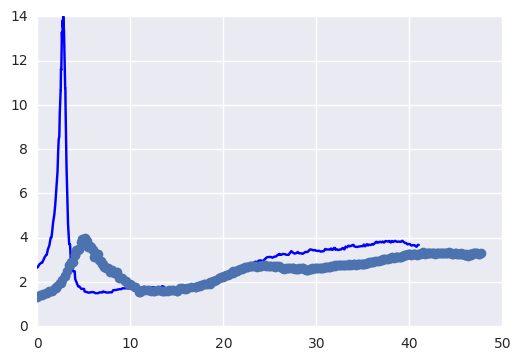

In [46]:
fig, ax = plt.subplots()

ax.plot(df3['realtimeScaled'] , (df3['rmsSurf']/df3['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), c='b' )
#ax.plot(df4['realtimeScaled'] , (df4['rmsSurf']/df4['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' )

#ax.plot(df5['realtimeScaled'] , (df5['rmsSurf']/df5['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' )
#ax.plot(dfR1['realtimeScaled'] , (dfR1['rmsSurf']/dfR1['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), c='g' )


ax.plot(dfB1['realtimeScaled'] , (dfB1['rmsSurf']/dfB1['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' )
#ax.plot(dfB2['realtimeScaled'] , (dfB2['rmsSurf']/dfB2['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365))
#ax.plot(dfB3['realtimeScaled'] , (dfB3['rmsSurf']/dfB3['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' )
#ax.plot(dfB4['realtimeScaled'] , (dfB4['rmsSurf']/dfB4['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' )


#ax.plot(df3['realtimeScaled'] , (df3['maxVxsurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' )
#ax.plot(df5['realtimeScaled'] , (df5['rmsSurf']/df5['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' )
#ax.plot(df6['realtimeScaled'] , (df6['rmsSurf']/df6['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' , c='r')
#ax.plot(df7['realtimeScaled'] , (df7['rmsSurf']/df7['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' , c='g')
#ax.plot(df8['realtimeScaled'] , (df8['rmsSurf']/df8['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' , c='c')
#ax.plot(df9['realtimeScaled'] , (df9['rmsSurf']/df9['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' , c='b')
#ax.plot(df10['realtimeScaled'] , (df10['rmsSurf']/df10['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), marker='o' , c='y')


#ax.set_xlim(0, 50)

In [42]:
#df5.columns